<a href="https://colab.research.google.com/github/vvrgit/AI-Projects/blob/main/ZCP_NTHD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google Drive#

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries#

In [3]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd

#ZCP-Dataset-01#

#Load Data#

In [4]:
# load dataset
dataset03 = pd.read_csv("/content/drive/MyDrive/B.Tech Projects/2021-2022/ZCP/Noise-Data/ZCP-CSV/ZCP-NOISE-01.csv")
dataset03.head()

,Slope,Intercept,R,RMSE,label
0,323.707793,-0.001276,0.985857,0.007952,1
1,278.334483,0.007161,0.965635,0.012121,0
2,295.054647,0.001057,0.969708,0.012389,0
3,296.718752,0.006121,0.968179,0.011155,0
4,506.344807,-0.102235,0.937057,0.041172,0


## **Box Plots**

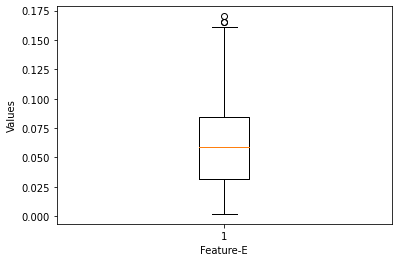

In [14]:
import matplotlib.pyplot as plt
from pylab import *

# figure related code
fig = plt.figure()
##fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(dataset03.RMSE)

#ax.set_title('axes title')
ax.set_xlabel('Feature-E')
ax.set_ylabel('Values')

plt.show()

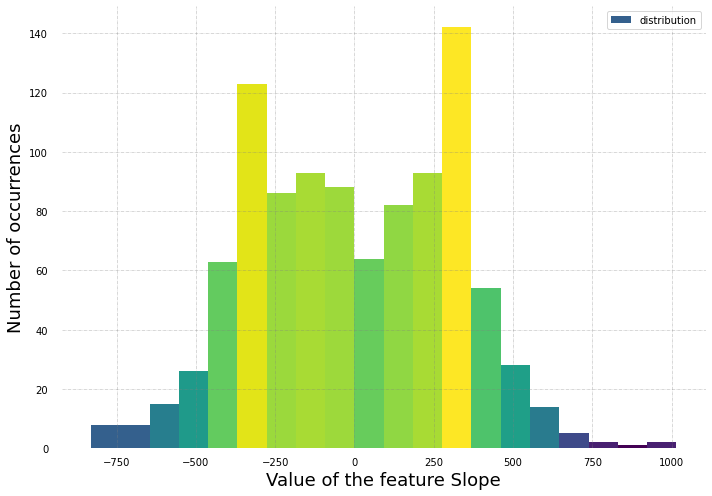

In [28]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
 
 
# Creating dataset
np.random.seed(23685752)
N_points = 10000
n_bins = 20
 
# Creating distribution
x = np.random.randn(N_points)
y = .8 ** x + np.random.randn(10000) + 25
legend = ['distribution']
 
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
 

# Creating histogram
N, bins, patches = axs.hist(dataset03.Slope, bins = n_bins)
 
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel('Value of the feature Slope', fontsize=18)
plt.ylabel('Number of occurrences', fontsize=18)
plt.legend(legend)
#plt.title('Customized histogram')
 
# Show plot
plt.show()

#Data Normalization#

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(dataset03)
data

array([[0.62538848, 0.53316552, 0.99298461, 0.03573802, 1.        ],
       [0.60080565, 0.53321943, 0.98278046, 0.06052042, 0.        ],
       [0.60986448, 0.53318042, 0.98483585, 0.06211258, 0.        ],
       ...,
       [0.66110217, 0.28435546, 0.99507448, 0.09873651, 0.        ],
       [0.64606721, 0.30202947, 0.99536012, 0.05545617, 0.        ],
       [0.62252113, 0.32973938, 0.99833388, 0.0117413 , 1.        ]])

#Data Split#

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
y_train = df_train[:,4]
X_train = df_train[:,0:4]
y_test = df_test[:,4]
X_test = df_test[:,0:4]

#Random Forest Model#

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 1, criterion="entropy")  #criterion="gini"
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1)

In [ ]:
#Predicting the test set result  
y_pred_test= classifier.predict(X_test)
y_pred_train= classifier.predict(X_train)

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Testing Accuracy: 0.9933333333333333
Training Accuracy: 0.9928263988522238


#Logistic Regression Model#

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Predicting the test set result  
y_pred_test= lr_model.predict(X_test)
y_pred_train= lr_model.predict(X_train)

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Testing Accuracy: 0.9766666666666667
Training Accuracy: 0.9784791965566715


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[293,   0],
       [  7,   0]])

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[682,   0],
       [ 15,   0]])

#Decision Tree#

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=12)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
clf.get_depth()

12

In [ ]:
#Predicting the test set result  
y_pred_test= clf.predict(X_test)
y_pred_train= clf.predict(X_train)

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Testing Accuracy: 0.9833333333333333
Training Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[289,   4],
       [  1,   6]])

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[682,   0],
       [  0,  15]])